In [1]:
import matplotlib.pyplot as plt
import numpy as np


%matplotlib widget
plt.ioff()

def plot_sets(ax,gr=False,ti='',xla=False,yla=False,zla=False,xli=False,yli=False,zli=False,ticks_off=False,xticks_off=False,yticks_off=False,zticks_off=False, ba=False, ar=False,leg=False,view=False):
    
    ax.set_title(ti)
    if gr:  ax.grid(gr);ax.set_axisbelow(True)
    if xla: ax.set_xlabel(xla)
    if yla: ax.set_ylabel(yla)
    if zla: ax.set_zlabel(zla)

    if xticks_off: ax.set_xticklabels([])
    if yticks_off: ax.set_yticklabels([])
    if zticks_off: ax.set_zticklabels([])

    if   ticks_off==1: ax.set_xticklabels([]); ax.set_xticks([]);ax.set_yticklabels([]); ax.set_yticks([])
    elif ticks_off==2: ax.set_xticklabels([]); ax.set_xticks([])
    elif ticks_off==2: ax.set_yticklabels([]); ax.set_yticks([])

    if ba: ax.set_box_aspect(ba)
    if ar: ax.set_aspect(ar)

    if xli: ax.set_xlim(xli)
    if yli: ax.set_ylim(yli)
    if zli: ax.set_zlim(zli)

    if leg: ax.legend(**leg)

    if view:ax.view_init(**view)

SMALL_SIZE  = 8
MEDIUM_SIZE = 10

# title
plt.rc('axes',titlesize=MEDIUM_SIZE,titleweight='bold')
# xy-labells
plt.rc('axes',labelsize=SMALL_SIZE)
# xy-ticks
plt.rc('xtick',labelsize=SMALL_SIZE)
plt.rc('ytick',labelsize=SMALL_SIZE)
    
px2inch = 1/plt.rcParams['figure.dpi']

In [2]:

def ExpMovAvg(Y,Beta): # Exponential Moving Average(EMA)
    EMA    = np.zeros_like(Y)
    for t,y in enumerate(Y):
        if t==0: EMA[t] = y
        else:    EMA[t] = Beta*EMA[t-1]+(1-Beta)*y
    return EMA
    


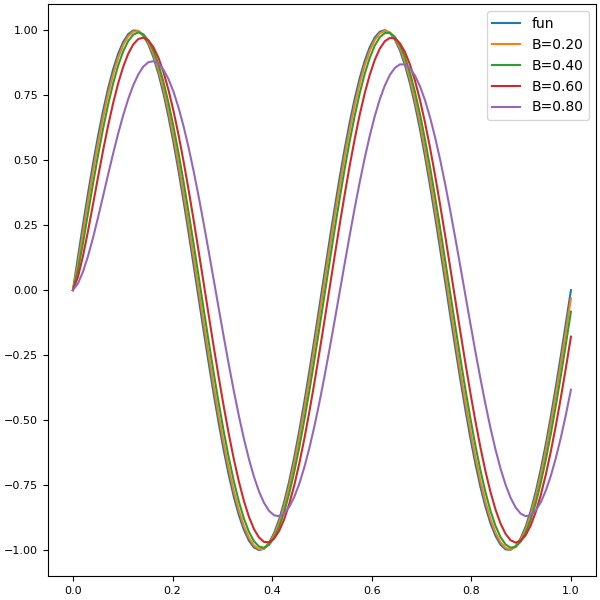

In [3]:
plt.close('all')

size_plot = 600
fig, ax   = plt.subplots(1,1,figsize=(1*size_plot*px2inch,1*size_plot*px2inch),constrained_layout=True)

Npts = 100
frec = 2
t = np.linspace(0,1,Npts)
Y = np.sin(2*np.pi*frec*t)

ax.plot(t,Y,label='fun')

for Beta in np.arange(0.2,1,0.2):
    EMA  = ExpMovAvg(Y,Beta)
    ax.plot(t,EMA,label=f'B={Beta:0.2f}')

ax.legend()
plt.show()


In [4]:
# %timeit Bezier_loop(P)
# %timeit Bezier_mat(P)